# Pandas - Part 2

# Combining and Merging Datasets

In [1]:
import pandas as pd
import numpy as np

## Joining DataFrame

![](https://documentation.mindsphere.io/resources/html/predictive-learning/en-US/Images/Joins_Diagram.png)

In [2]:
d1=pd.DataFrame(
    {"key":["a","b","c","c","d","e"],
     "num1":range(6)})
d2=pd.DataFrame(
    {"key":["b","c","e","f"],
     "num2":range(4)})

In [3]:
print(d1)
print(d2)

  key  num1
0   a     0
1   b     1
2   c     2
3   c     3
4   d     4
5   e     5
  key  num2
0   b     0
1   c     1
2   e     2
3   f     3


In [4]:
# pandas merge d1 d2 not define key
pd.merge(d1,d2)

,key,num1,num2
0,b,1,0
1,c,2,1
2,c,3,1
3,e,5,2


In [5]:
# pandas merge with key
pd.merge(d1,d2,on='key')

,key,num1,num2
0,b,1,0
1,c,2,1
2,c,3,1
3,e,5,2


In [6]:
d3=pd.DataFrame(
    {"key1":["a","b","c","c","d","e"],
     "num1":range(6)})
d4=pd.DataFrame(
    {"key2":["b","c","e","f"],
     "num2":range(4)})

In [7]:
display(d3)
display(d4)

,key1,num1
0,a,0
1,b,1
2,c,2
3,c,3
4,d,4
5,e,5


,key2,num2
0,b,0
1,c,1
2,e,2
3,f,3


In [8]:
# pandas merge with left on, right on
pd.merge(d3,d4,left_on='key1',right_on='key2')

,key1,num1,key2,num2
0,b,1,b,0
1,c,2,c,1
2,c,3,c,1
3,e,5,e,2


In [9]:
# outer join
pd.merge(d3,d4,left_on='key1',right_on='key2',how='outer')

,key1,num1,key2,num2
0,a,0.0,NaN,NaN
1,b,1.0,b,0.0
2,c,2.0,c,1.0
3,c,3.0,c,1.0
4,d,4.0,NaN,NaN
5,e,5.0,e,2.0
6,NaN,NaN,f,3.0


In [10]:
# left join
pd.merge(d3,d4,left_on='key1',right_on='key2',how='left')

,key1,num1,key2,num2
0,a,0,NaN,NaN
1,b,1,b,0.0
2,c,2,c,1.0
3,c,3,c,1.0
4,d,4,NaN,NaN
5,e,5,e,2.0


In [11]:
# right join
pd.merge(d3,d4,left_on='key1',right_on='key2',how='right')

,key1,num1,key2,num2
0,b,1.0,b,0
1,c,2.0,c,1
2,c,3.0,c,1
3,e,5.0,e,2
4,NaN,NaN,f,3


In [12]:
# inner join
pd.merge(d3,d4,left_on='key1',right_on='key2',how='inner')

,key1,num1,key2,num2
0,b,1,b,0
1,c,2,c,1
2,c,3,c,1
3,e,5,e,2


In [13]:
df1=pd.DataFrame(
    {"key":["a","b","c","c","d","e"],
     "num1":range(6),
     "count":["one","three","two",
              "one","one","two"]})
df2=pd.DataFrame(
    {"key":["b","c","e","f"],
     "num2":range(4),
     "count":["one","two","two","two"]})

In [14]:
print(df1)
print(df2)

  key  num1  count
0   a     0    one
1   b     1  three
2   c     2    two
3   c     3    one
4   d     4    one
5   e     5    two
  key  num2 count
0   b     0   one
1   c     1   two
2   e     2   two
3   f     3   two


In [15]:
# outer join key: key, count
pd.merge(df1,df2,on=['key','count'],how='outer')

,key,num1,count,num2
0,a,0.0,one,NaN
1,b,1.0,three,NaN
2,c,2.0,two,1.0
3,c,3.0,one,NaN
4,d,4.0,one,NaN
5,e,5.0,two,2.0
6,b,NaN,one,0.0
7,f,NaN,two,3.0


In [16]:
pd.merge(df1, df2, on="key", how='outer')

,key,num1,count_x,num2,count_y
0,a,0.0,one,NaN,NaN
1,b,1.0,three,0.0,one
2,c,2.0,two,1.0,two
3,c,3.0,one,1.0,two
4,d,4.0,one,NaN,NaN
5,e,5.0,two,2.0,two
6,f,NaN,NaN,3.0,two


In [17]:
# join with suffixes
pd.merge(df1,df2,on='key',suffixes=('_df1','df2'))

,key,num1,count_df1,num2,countdf2
0,b,1,three,0,one
1,c,2,two,1,two
2,c,3,one,1,two
3,e,5,two,2,two


## Merging on index

In [18]:
df1=pd.DataFrame(
    {"letter":["a","a","b",
               "b","a","c"],
     "num":range(6)}) 
df2=pd.DataFrame(
    {"value":[3,5,7]},
    index=["a","b","e"])

In [19]:
print(df1)
print(df2)

  letter  num
0      a    0
1      a    1
2      b    2
3      b    3
4      a    4
5      c    5
   value
a      3
b      5
e      7


In [20]:
# right index
pd.merge(df1,df2,left_on='letter',right_index=True)

,letter,num,value
0,a,0,3
1,a,1,3
4,a,4,3
2,b,2,5
3,b,3,5


In [21]:
right=pd.DataFrame(
    [[1,2],[3,4],[5,6]],
    index=["a","c","d"],
    columns=["Tom","Tim"])
left=pd.DataFrame(
    [[7,8],[9,10],[11,12],[13,14]],
    index=["a","b","e","f"],
    columns=["Sam","Kim"])

In [22]:
print(left)
print(right)

   Sam  Kim
a    7    8
b    9   10
e   11   12
f   13   14
   Tom  Tim
a    1    2
c    3    4
d    5    6


In [23]:
pd.merge(right,left, 
         right_index=True, 
         left_index=True, 
         how="outer")

,Tom,Tim,Sam,Kim
a,1.0,2.0,7.0,8.0
b,NaN,NaN,9.0,10.0
c,3.0,4.0,NaN,NaN
d,5.0,6.0,NaN,NaN
e,NaN,NaN,11.0,12.0
f,NaN,NaN,13.0,14.0


In [24]:
left.join(right)

,Sam,Kim,Tom,Tim
a,7,8,1.0,2.0
b,9,10,NaN,NaN
e,11,12,NaN,NaN
f,13,14,NaN,NaN


In [25]:
left.join(right,how="outer")

,Sam,Kim,Tom,Tim
a,7.0,8.0,1.0,2.0
b,9.0,10.0,NaN,NaN
c,NaN,NaN,3.0,4.0
d,NaN,NaN,5.0,6.0
e,11.0,12.0,NaN,NaN
f,13.0,14.0,NaN,NaN


In [26]:
data=pd.DataFrame([[1,3],[5,7],[9,11]],            
                  index=["a","b","f"],      
                  columns=["Alex","Keta"])
data

,Alex,Keta
a,1,3
b,5,7
f,9,11


In [27]:
# join multiple df without common key
left.join([right,data])

,Sam,Kim,Tom,Tim,Alex,Keta
a,7.0,8.0,1.0,2.0,1.0,3.0
b,9.0,10.0,NaN,NaN,5.0,7.0
e,11.0,12.0,NaN,NaN,NaN,NaN
f,13.0,14.0,NaN,NaN,9.0,11.0


## Concatenating Along an Axis

In [28]:
seq = np.arange(20).reshape((4, 5))
seq

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [29]:
# numpy concatenate seq seq col
np.concatenate([seq,seq],axis=1)

array([[ 0,  1,  2,  3,  4,  0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19, 15, 16, 17, 18, 19]])

In [30]:
# numpy concatenate seq seq row
np.concatenate([seq,seq],axis=0)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [31]:
data1 = pd.Series(
    [0, 1], index=['a', 'b'])
data2 = pd.Series(
    [2,3,4], index=['c','d','e'])
data3 = pd.Series(
    [5, 6], index=['f', 'g'])
print(data1)
print(data2)
print(data3)

a    0
b    1
dtype: int64
c    2
d    3
e    4
dtype: int64
f    5
g    6
dtype: int64


In [32]:
# pandas concat data 1 2 3
pd.concat([data1,data2,data3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [33]:
# pandas concat data 1 2 3 col
pd.concat([data1,data2,data3],axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [34]:
data1 = pd.DataFrame(
    np.random.randn(3, 4),
    columns=['a','b','c','d'])
data2 = pd.DataFrame(
    np.random.randn(2, 3),
    columns=['b','d','a'])
print(data1)
print(data2)

          a         b         c         d
0 -1.011367  0.373200  0.964594  0.596719
1 -0.419726  0.619621  2.121264 -0.941599
2 -0.118080  0.112436 -0.437437  0.668577
          b         d         a
0  0.826440 -1.523260  0.861814
1  0.670529 -0.912608 -0.916746


In [35]:
# concat and ignore_index
pd.concat([data1,data2])

,a,b,c,d
0,-1.011367,0.373200,0.964594,0.596719
1,-0.419726,0.619621,2.121264,-0.941599
2,-0.118080,0.112436,-0.437437,0.668577
0,0.861814,0.826440,NaN,-1.523260
1,-0.916746,0.670529,NaN,-0.912608


In [36]:
pd.concat([data1,data2],ignore_index=True)

,a,b,c,d
0,-1.011367,0.373200,0.964594,0.596719
1,-0.419726,0.619621,2.121264,-0.941599
2,-0.118080,0.112436,-0.437437,0.668577
3,0.861814,0.826440,NaN,-1.523260
4,-0.916746,0.670529,NaN,-0.912608


# Reshaping and Pivoting

In [37]:
s1=pd.Series(
    np.arange(4),index=list("abcd"))
s2=pd.Series(
    np.arange(6,9),index=list("cde"))

In [38]:
print(s1)
print(s2)

a    0
b    1
c    2
d    3
dtype: int32
c    6
d    7
e    8
dtype: int32


In [39]:
data2=pd.concat([s1,s2],keys=["s1","s2"])
data2

s1  a    0
    b    1
    c    2
    d    3
s2  c    6
    d    7
    e    8
dtype: int32

In [40]:
# unstack
data2.unstack()

,a,b,c,d,e
s1,0.0,1.0,2.0,3.0,NaN
s2,NaN,NaN,6.0,7.0,8.0


In [41]:
data2.unstack().stack(dropna=True)

s1  a    0.0
    b    1.0
    c    2.0
    d    3.0
s2  c    6.0
    d    7.0
    e    8.0
dtype: float64

In [42]:
data2.unstack().stack(dropna=False)

s1  a    0.0
    b    1.0
    c    2.0
    d    3.0
    e    NaN
s2  a    NaN
    b    NaN
    c    6.0
    d    7.0
    e    8.0
dtype: float64

## Pivoting “Long” to “Wide” Format

In [43]:
stock=pd.DataFrame(
    {"fruit": ["apple", "plum","grape"]*2,
     "color": ["purple","yellow"]*3,
     "piece":[3,4,5,6,1,2]})

In [44]:
stock.sort_values(by=['fruit','color'])

,fruit,color,piece
0,apple,purple,3
3,apple,yellow,6
2,grape,purple,5
5,grape,yellow,2
4,plum,purple,1
1,plum,yellow,4


In [45]:
# pivot to wide table
stock.pivot(index='fruit',columns='color',values='piece')
# stock.pivot('fruit','color','piece')

color,purple,yellow
fruit,,
apple,3,6
grape,5,2
plum,1,4


In [46]:
stock["value"]=np.random.randn(len(stock))

In [47]:
stock

,fruit,color,piece,value
0,apple,purple,3,0.926740
1,plum,yellow,4,-0.268833
2,grape,purple,5,-0.953600
3,apple,yellow,6,-1.067793
4,plum,purple,1,-1.196487
5,grape,yellow,2,0.726607


In [48]:
p=stock.pivot("fruit","color")
p

piece            value          
color purple yellow    purple    yellow
fruit                                  
apple      3      6  0.926740 -1.067793
grape      5      2 -0.953600  0.726607
plum       1      4 -1.196487 -0.268833

In [49]:
p["value"]

color,purple,yellow
fruit,,
apple,0.926740,-1.067793
grape,-0.953600,0.726607
plum,-1.196487,-0.268833


## Pivoting “Wide” to “Long” Format

In [50]:
import pandas as pd

In [51]:
data=pd.DataFrame(
    {"lesson":["math","stat","bio"],
     "Sam":[50,60,70],
     "Kim":[80,70,90],
     "Tom":[60,70,85]})
data

,lesson,Sam,Kim,Tom
0,math,50,80,60
1,stat,60,70,70
2,bio,70,90,85


In [52]:
# melt to long table
group = pd.melt(data,['lesson'])
group

,lesson,variable,value
0,math,Sam,50
1,stat,Sam,60
2,bio,Sam,70
3,math,Kim,80
4,stat,Kim,70
5,bio,Kim,90
6,math,Tom,60
7,stat,Tom,70
8,bio,Tom,85


In [53]:
group.rename(columns={'variable':'student','value':'score'}, inplace=True)
group

,lesson,student,score
0,math,Sam,50
1,stat,Sam,60
2,bio,Sam,70
3,math,Kim,80
4,stat,Kim,70
5,bio,Kim,90
6,math,Tom,60
7,stat,Tom,70
8,bio,Tom,85


In [54]:
data=group.pivot(
    "lesson","student","score")
data

student,Kim,Sam,Tom
lesson,,,
bio,90,70,85
math,80,50,60
stat,70,60,70


In [55]:
data.reset_index()

student,lesson,Kim,Sam,Tom
0,bio,90,70,85
1,math,80,50,60
2,stat,70,60,70


In [56]:
data = data.reset_index()

In [57]:
data.columns

Index(['lesson', 'Kim', 'Sam', 'Tom'], dtype='object', name='student')

# Groupby

## What is GroupBy?

In [58]:
df=pd.DataFrame(
    {"key1":list("aabbab"),
     "key2":["one","two","three"]*2,
     "data1":np.random.randn(6),
     "data2":np.random.randn(6)})
df

,key1,key2,data1,data2
0,a,one,1.024790,-1.047167
1,a,two,1.267133,-0.498962
2,b,three,-1.626400,0.221651
3,b,one,-0.680469,-0.562013
4,a,two,1.323681,-0.247125
5,b,three,0.695463,-0.858626


In [59]:
group=df["data1"].groupby(df["key1"])

In [60]:
group

In [61]:
group.mean()

key1
a    1.205201
b   -0.537136
Name: data1, dtype: float64

In [62]:
ave=df["data1"].groupby([df["key1"],df["key2"]]).mean()
ave

key1  key2 
a     one      1.024790
      two      1.295407
b     one     -0.680469
      three   -0.465469
Name: data1, dtype: float64

In [63]:
ave.unstack()

key2,one,three,two
key1,,,
a,1.024790,NaN,1.295407
b,-0.680469,-0.465469,NaN


In [64]:
df.groupby("key1").mean()

,data1,data2
key1,,
a,1.205201,-0.597751
b,-0.537136,-0.399662


In [65]:
df.groupby(["key1","key2"]).mean()

data1     data2
key1 key2                     
a    one    1.024790 -1.047167
     two    1.295407 -0.373043
b    one   -0.680469 -0.562013
     three -0.465469 -0.318487

## Selecting a Column or Subset of Columns

In [66]:
df

,key1,key2,data1,data2
0,a,one,1.024790,-1.047167
1,a,two,1.267133,-0.498962
2,b,three,-1.626400,0.221651
3,b,one,-0.680469,-0.562013
4,a,two,1.323681,-0.247125
5,b,three,0.695463,-0.858626


In [67]:
# mean of data1 by key1
df.groupby('key1')['data1'].mean().reset_index()
# df.groupby('key1',as_index=False)['data1'].mean()

,key1,data1
0,a,1.205201
1,b,-0.537136


In [68]:
# mean of data1 by key1, key 2
df.groupby(['key1','key2'],as_index=False)['data1'].mean()

,key1,key2,data1
0,a,one,1.024790
1,a,two,1.295407
2,b,one,-0.680469
3,b,three,-0.465469


In [69]:
# mean of data1, data2 by key1
df.groupby('key1',as_index=False)[['data1','data2']].mean()

,key1,data1,data2
0,a,1.205201,-0.597751
1,b,-0.537136,-0.399662


## Grouping by Index Levels

In [70]:
data=pd.DataFrame(np.random.randn(4,5),
                  columns=[list("AAABB"),
                           [1,2,3,1,2]])

In [71]:
data.head()

A                             B          
          1         2         3         1         2
0 -0.780839 -0.285659  0.137349  0.529404  1.090573
1  0.548101  1.016595  0.029114  0.012547  1.355392
2  0.509266  1.070816 -0.190825 -0.323010 -0.857330
3  1.932016  0.128288  0.109007  0.387530 -0.417800

In [72]:
data.columns.names=["letter","number"]
data

letter         A                             B          
number         1         2         3         1         2
0      -0.780839 -0.285659  0.137349  0.529404  1.090573
1       0.548101  1.016595  0.029114  0.012547  1.355392
2       0.509266  1.070816 -0.190825 -0.323010 -0.857330
3       1.932016  0.128288  0.109007  0.387530 -0.417800

In [73]:
data.groupby(level="letter",axis=1).sum()

letter,A,B
0,-0.929149,1.619977
1,1.593810,1.367939
2,1.389257,-1.180340
3,2.169310,-0.030270


## Application with Real Data Set 

In [74]:
df=pd.read_csv('Data/vgsalesGlobale.csv')

In [75]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [76]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [78]:
#Global_Sales average
df['Global_Sales'].mean()

0.53744065550074

In [79]:
df.Global_Sales.mean()

0.53744065550074

In [80]:
# total global sales of each genre
df["Global_Sales"].groupby(df["Genre"]).sum()

Genre
Action          1751.18
Adventure        239.04
Fighting         448.91
Misc             809.96
Platform         831.37
Puzzle           244.95
Racing           732.04
Role-Playing     927.37
Shooter         1037.37
Simulation       392.20
Sports          1330.93
Strategy         175.12
Name: Global_Sales, dtype: float64

In [81]:
df.groupby('Genre')['Global_Sales'].sum()

Genre
Action          1751.18
Adventure        239.04
Fighting         448.91
Misc             809.96
Platform         831.37
Puzzle           244.95
Racing           732.04
Role-Playing     927.37
Shooter         1037.37
Simulation       392.20
Sports          1330.93
Strategy         175.12
Name: Global_Sales, dtype: float64

In [82]:
# Genre groupby
df.groupby("Genre").mean()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,7973.879071,2007.909929,0.264726,0.158323,0.048236,0.056508,0.528100
Adventure,11532.787714,2008.130878,0.082271,0.049868,0.040490,0.013072,0.185879
Fighting,7646.511792,2004.630383,0.263667,0.119481,0.103007,0.043255,0.529375
Misc,8561.847039,2007.258480,0.235906,0.124198,0.061967,0.043312,0.465762
Platform,6927.251693,2003.820776,0.504571,0.227573,0.147596,0.058228,0.938341
Puzzle,9627.381443,2005.243433,0.212680,0.087251,0.098471,0.021564,0.420876
Racing,7961.515612,2004.840131,0.287766,0.190865,0.045388,0.061865,0.586101
Role-Playing,8086.174731,2007.055744,0.219946,0.126384,0.236767,0.040060,0.623233
Shooter,7369.367939,2005.918877,0.444733,0.239137,0.029221,0.078389,0.791885


In [83]:
%matplotlib inline

<AxesSubplot:xlabel='Genre'>

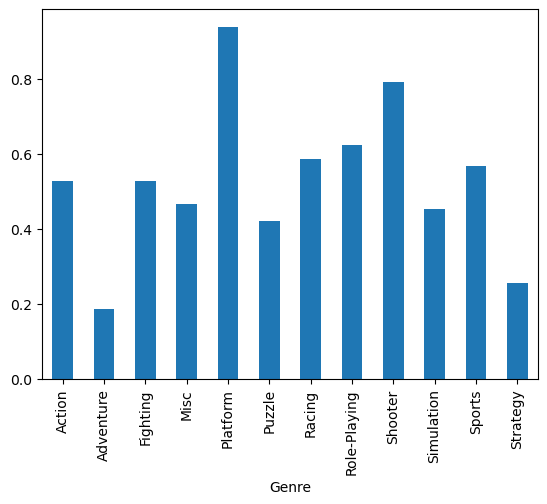

In [84]:
df["Global_Sales"].groupby(df["Genre"]).mean().plot(kind='bar')

<AxesSubplot:xlabel='Genre'>

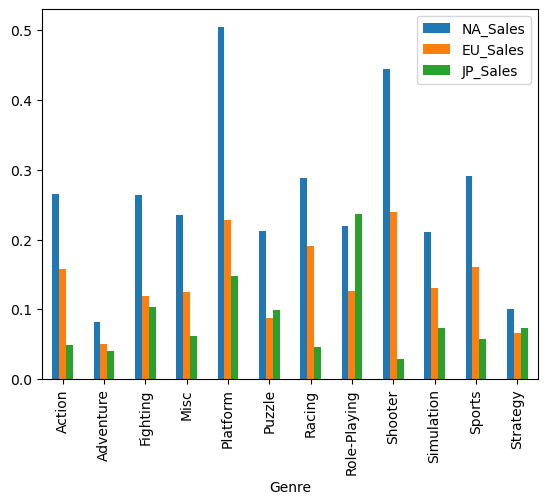

In [85]:
df[['NA_Sales','EU_Sales','JP_Sales']].groupby(df["Genre"]).mean().plot(kind='bar')

In [86]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [87]:
'''
    Tạo bảng mean_sale: ghi nhận doanh thu trung bình của 4 thị trường NA, EU, JP, Other theo từng tựa game
'''

'\n    Tạo bảng mean_sale: ghi nhận doanh thu trung bình của 4 thị trường NA, EU, JP, Other theo từng tựa game\n'

In [88]:
mean_sale=df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].groupby(df["Name"]).mean()
mean_sale

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Name,,,,
'98 Koshien,0.150,0.10,0.12,0.03
.hack//G.U. Vol.1//Rebirth,0.000,0.00,0.17,0.00
.hack//G.U. Vol.2//Reminisce,0.110,0.09,0.00,0.03
.hack//G.U. Vol.2//Reminisce (jp sales),0.000,0.00,0.16,0.00
.hack//G.U. Vol.3//Redemption,0.000,0.00,0.17,0.00
...,...,...,...,...
thinkSMART: Chess for Kids,0.010,0.00,0.00,0.00
uDraw Studio,1.670,0.58,0.00,0.20
uDraw Studio: Instant Artist,0.045,0.05,0.00,0.01


In [89]:
'''
    Tạo bảng publish_year: ghi nhận năm phát hành của từng tựa game
'''

'\n    Tạo bảng publish_year: ghi nhận năm phát hành của từng tựa game\n'

In [90]:
publish_year=df['Year'].groupby(df['Name']).min()
publish_year

Name
'98 Koshien                                1998.0
.hack//G.U. Vol.1//Rebirth                 2006.0
.hack//G.U. Vol.2//Reminisce               2006.0
.hack//G.U. Vol.2//Reminisce (jp sales)    2006.0
.hack//G.U. Vol.3//Redemption              2007.0
                                            ...  
thinkSMART: Chess for Kids                 2011.0
uDraw Studio                               2010.0
uDraw Studio: Instant Artist               2011.0
wwe Smackdown vs. Raw 2006                    NaN
¡Shin Chan Flipa en colores!               2007.0
Name: Year, Length: 11493, dtype: float64

In [91]:
'''
    Merge bảng mean_sale và publish_year, key là tựa game
'''

'\n    Merge bảng mean_sale và publish_year, key là tựa game\n'

In [92]:
pd.merge(mean_sale,publish_year,on='Name',how='left')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year
Name,,,,,
'98 Koshien,0.150,0.10,0.12,0.03,1998.0
.hack//G.U. Vol.1//Rebirth,0.000,0.00,0.17,0.00,2006.0
.hack//G.U. Vol.2//Reminisce,0.110,0.09,0.00,0.03,2006.0
.hack//G.U. Vol.2//Reminisce (jp sales),0.000,0.00,0.16,0.00,2006.0
.hack//G.U. Vol.3//Redemption,0.000,0.00,0.17,0.00,2007.0
...,...,...,...,...,...
thinkSMART: Chess for Kids,0.010,0.00,0.00,0.00,2011.0
uDraw Studio,1.670,0.58,0.00,0.20,2010.0
uDraw Studio: Instant Artist,0.045,0.05,0.00,0.01,2011.0


In [93]:
'''
    Tạo bảng sale gồm các cột Name, NA_Sales, EU_Sales, JP_Sales, Other_Sales
    Chuyển bảng sale từ dạng wide về dạng long table
'''

'\n    Tạo bảng sale gồm các cột Name, NA_Sales, EU_Sales, JP_Sales, Other_Sales\n    Chuyển bảng sale từ dạng wide về dạng long table\n'

In [94]:
sale=df[['Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
table=pd.melt(sale,['Name'])
table.rename(columns={'variable':'Market','value':'Year'},inplace=True)
table

,Name,Market,Year
0,Wii Sports,NA_Sales,41.49
1,Super Mario Bros.,NA_Sales,29.08
2,Mario Kart Wii,NA_Sales,15.85
3,Wii Sports Resort,NA_Sales,15.75
4,Pokemon Red/Pokemon Blue,NA_Sales,11.27
...,...,...,...
66387,Woody Woodpecker in Crazy Castle 5,Other_Sales,0.00
66388,Men in Black II: Alien Escape,Other_Sales,0.00
66389,SCORE International Baja 1000: The Official Game,Other_Sales,0.00
66390,Know How 2,Other_Sales,0.00


# Pivot Tables

In [95]:
df=pd.DataFrame(
    {"class":list("ABC")*4,
     "lesson":["math","stat"]*6,
     "sex":list("MFMM")*3,
     "sibling":[1,2,3]*4,
     "score":np.arange(40,100,5)})

In [96]:
df

,class,lesson,sex,sibling,score
0,A,math,M,1,40
1,B,stat,F,2,45
2,C,math,M,3,50
3,A,stat,M,1,55
4,B,math,M,2,60
5,C,stat,F,3,65
6,A,math,M,1,70
7,B,stat,M,2,75
8,C,math,M,3,80
9,A,stat,F,1,85


In [97]:
d = df.groupby(["lesson","class"])["score"].mean().reset_index()
d

,lesson,class,score
0,math,A,55.0
1,math,B,75.0
2,math,C,65.0
3,stat,A,70.0
4,stat,B,60.0
5,stat,C,80.0


In [98]:
df.groupby(["lesson","class"])["score"].aggregate("mean").unstack()

class,A,B,C
lesson,,,
math,55.0,75.0,65.0
stat,70.0,60.0,80.0


In [99]:
# pivot table
pd.pivot_table(data=d,index='lesson',columns='class')

score            
class      A     B     C
lesson                  
math    55.0  75.0  65.0
stat    70.0  60.0  80.0

In [100]:
df.pivot_table(
    values=["sibling","score"],
    index=["class","lesson"],
    columns="sex")

score       sibling     
sex              F     M       F    M
class lesson                         
A     math     NaN  55.0     NaN  1.0
      stat    85.0  55.0     1.0  1.0
B     math     NaN  75.0     NaN  2.0
      stat    45.0  75.0     2.0  2.0
C     math     NaN  65.0     NaN  3.0
      stat    65.0  95.0     3.0  3.0

In [101]:
df.pivot_table(
    ["sibling","score"],
    index=["class","lesson"],
    columns="sex",margins=True)

score                  sibling          
sex              F          M   All       F    M  All
class lesson                                         
A     math     NaN  55.000000  55.0     NaN  1.0  1.0
      stat    85.0  55.000000  70.0     1.0  1.0  1.0
B     math     NaN  75.000000  75.0     NaN  2.0  2.0
      stat    45.0  75.000000  60.0     2.0  2.0  2.0
C     math     NaN  65.000000  65.0     NaN  3.0  3.0
      stat    65.0  95.000000  80.0     3.0  3.0  3.0
All           65.0  68.333333  67.5     2.0  2.0  2.0

In [102]:
df.pivot_table(
    ["sibling","score"],
    index=["class","lesson"],
    columns="sex",margins=True,aggfunc='sum')

score             sibling          
sex               F      M  All       F     M All
class lesson                                     
A     math      NaN  110.0  110     NaN   2.0   2
      stat     85.0   55.0  140     1.0   1.0   2
B     math      NaN  150.0  150     NaN   4.0   4
      stat     45.0   75.0  120     2.0   2.0   4
C     math      NaN  130.0  130     NaN   6.0   6
      stat     65.0   95.0  160     3.0   3.0   6
All           195.0  615.0  810     6.0  18.0  24

In [103]:
df.pivot_table(
    ["sibling","score"],
    index=["class","lesson"],
    columns="sex",fill_value=0)

score     sibling   
sex              F   M       F  M
class lesson                     
A     math       0  55       0  1
      stat      85  55       1  1
B     math       0  75       0  2
      stat      45  75       2  2
C     math       0  65       0  3
      stat      65  95       3  3

## Cross-Tabulations: Crosstab

In [104]:
# crosstab df sibling and lesson
pd.crosstab(df['sibling'],df['lesson'])

lesson,math,stat
sibling,,
1,2,2
2,2,2
3,2,2


In [105]:
pd.crosstab([df.sibling, df.lesson], df.sex)

sex             F  M
sibling lesson      
1       math    0  2
        stat    1  1
2       math    0  2
        stat    1  1
3       math    0  2
        stat    1  1

You can download the data set from https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

In [106]:
births=pd.read_csv("Data/births.txt")

In [107]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [108]:
births["ten_year"]=10*(births["year"]//10)
births.pivot_table("births",
                   index="ten_year",
                   columns="gender",
                   aggfunc="sum")

gender,F,M
ten_year,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [109]:
%matplotlib inline

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
sns.set() #For style

Text(0, 0.5, 'Annual total births')

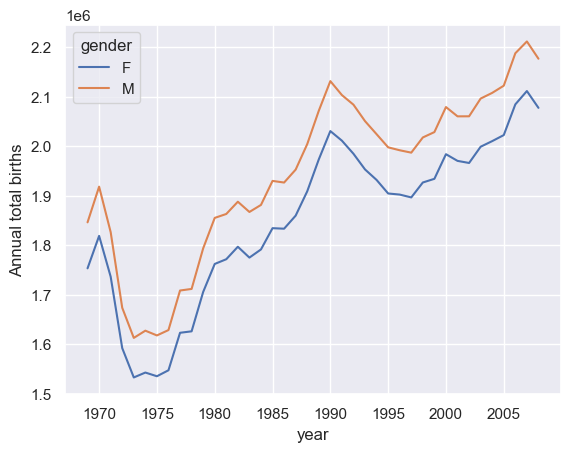

In [112]:
births.pivot_table("births",
                   index="year",
                   columns="gender",
                   aggfunc="sum").plot()
plt.ylabel("Annual total births")

# Working with Text Data

In [113]:
"hello".upper()

'HELLO'

## Vectorized String Functions in Pandas

In [114]:
data=["tim","Kate","SUSan",np.nan,"aLEX"]

In [115]:
name=pd.Series(data)
name

0      tim
1     Kate
2    SUSan
3      NaN
4     aLEX
dtype: object

In [116]:
name.str.capitalize()

0      Tim
1     Kate
2    Susan
3      NaN
4     Alex
dtype: object

In [117]:
name.str.lower()

0      tim
1     kate
2    susan
3      NaN
4     alex
dtype: object

In [118]:
name.str.len()

0    3.0
1    4.0
2    5.0
3    NaN
4    4.0
dtype: float64

In [119]:
name.str.startswith("a")

0    False
1    False
2    False
3      NaN
4     True
dtype: object

In [120]:
df=pd.DataFrame(
    np.random.randn(3,2),
    columns=["Column A","Column B"],
    index=range(3))
df

,Column A,Column B
0,0.336260,-0.044899
1,0.481155,0.109355
2,0.736702,1.970521


In [121]:
df.columns

Index(['Column A', 'Column B'], dtype='object')

In [122]:
df.columns.str.lower().str.replace(" ","_").to_list()

['column_a', 'column_b']

In [123]:
df.columns = df.columns.str.lower().str.replace(" ","_").to_list()
df

,column_a,column_b
0,0.336260,-0.044899
1,0.481155,0.109355
2,0.736702,1.970521


In [124]:
s=pd.Series(["a_b_c","c_d_e",np.nan,"f_g_h"])
s

0    a_b_c
1    c_d_e
2      NaN
3    f_g_h
dtype: object

In [125]:
s.str.split("_").str[1]

0      b
1      d
2    NaN
3      g
dtype: object

In [126]:
s.str.split("_",expand=True)

,0,1,2
0,a,b,c
1,c,d,e
2,NaN,NaN,NaN
3,f,g,h


In [127]:
s.str.split("_",expand=True,n=1)

,0,1
0,a,b_c
1,c,d_e
2,NaN,NaN
3,f,g_h


In [128]:
money=pd.Series(["15","-$20","$30000"])
money

0        15
1      -$20
2    $30000
dtype: object

In [129]:
money.str.replace("-\$","")

C:\Users\DANG TRAN\AppData\Local\Temp\ipykernel_5560\2480055249.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  money.str.replace("-\$","")


0        15
1        20
2    $30000
dtype: object

In [130]:
money.str.replace("-\$","-")

C:\Users\DANG TRAN\AppData\Local\Temp\ipykernel_5560\3340069485.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  money.str.replace("-\$","-")


0        15
1       -20
2    $30000
dtype: object

You can use google or pandas.pydata.org to see the string methods of Pandas documentation.

In [131]:
film=pd.read_csv("http://bit.ly/imdbratings")

In [132]:
film.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [133]:
film['title'] = film.title.str.upper()
film

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,THE SHAWSHANK REDEMPTION,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,THE GODFATHER,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,THE GODFATHER: PART II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,THE DARK KNIGHT,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,PULP FICTION,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,TOOTSIE,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,BACK TO THE FUTURE PART III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,MASTER AND COMMANDER: THE FAR SIDE OF THE WORLD,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,POLTERGEIST,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [134]:
film.columns=film.columns.str.capitalize()

In [135]:
film.head()

,Star_rating,Title,Content_rating,Genre,Duration,Actors_list
0,9.3,THE SHAWSHANK REDEMPTION,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,THE GODFATHER,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,THE GODFATHER: PART II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,THE DARK KNIGHT,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,PULP FICTION,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [136]:
film[film.Actors_list.str.contains("Brad Pitt")]

,Star_rating,Title,Content_rating,Genre,Duration,Actors_list
9,8.9,FIGHT CLUB,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
24,8.7,SE7EN,R,Drama,127,"[u'Morgan Freeman', u'Brad Pitt', u'Kevin Spac..."
106,8.3,SNATCH.,R,Comedy,102,"[u'Jason Statham', u'Brad Pitt', u'Benicio Del..."
114,8.3,INGLOURIOUS BASTERDS,R,Adventure,153,"[u'Brad Pitt', u'Diane Kruger', u'Eli Roth']"
264,8.1,TWELVE MONKEYS,R,Mystery,129,"[u'Bruce Willis', u'Madeleine Stowe', u'Brad P..."
508,7.8,THE CURIOUS CASE OF BENJAMIN BUTTON,PG-13,Drama,166,"[u'Brad Pitt', u'Cate Blanchett', u'Tilda Swin..."
577,7.8,OCEAN'S ELEVEN,PG-13,Crime,116,"[u'George Clooney', u'Brad Pitt', u'Julia Robe..."
683,7.7,FURY,R,Action,134,"[u'Brad Pitt', u'Shia LaBeouf', u'Logan Lerman']"
776,7.6,MONEYBALL,PG-13,Biography,133,"[u'Brad Pitt', u'Robin Wright', u'Jonah Hill']"
779,7.6,INTERVIEW WITH THE VAMPIRE: THE VAMPIRE CHRONI...,R,Horror,123,"[u'Brad Pitt', u'Tom Cruise', u'Antonio Bander..."


In [137]:
film.Actors_list=film.Actors_list.str.replace("[","").str.replace("]","").str.replace("u'","")
film

C:\Users\DANG TRAN\AppData\Local\Temp\ipykernel_5560\288611417.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  film.Actors_list=film.Actors_list.str.replace("[","").str.replace("]","").str.replace("u'","")


,Star_rating,Title,Content_rating,Genre,Duration,Actors_list
0,9.3,THE SHAWSHANK REDEMPTION,R,Crime,142,"Tim Robbins', Morgan Freeman', Bob Gunton'"
1,9.2,THE GODFATHER,R,Crime,175,"Marlon Brando', Al Pacino', James Caan'"
2,9.1,THE GODFATHER: PART II,R,Crime,200,"Al Pacino', Robert De Niro', Robert Duvall'"
3,9.0,THE DARK KNIGHT,PG-13,Action,152,"Christian Bale', Heath Ledger', Aaron Eckhart'"
4,8.9,PULP FICTION,R,Crime,154,"John Travolta', Uma Thurman', Samuel L. Jackson'"
...,...,...,...,...,...,...
974,7.4,TOOTSIE,PG,Comedy,116,"Dustin Hoffman', Jessica Lange', Teri Garr'"
975,7.4,BACK TO THE FUTURE PART III,PG,Adventure,118,"Michael J. Fox', Christopher Lloyd', Mary Stee..."
976,7.4,MASTER AND COMMANDER: THE FAR SIDE OF THE WORLD,PG-13,Action,138,"Russell Crowe', Paul Bettany', Billy Boyd'"
977,7.4,POLTERGEIST,PG,Horror,114,"JoBeth Williams', u""Heather O'Rourke"", Craig T..."


In [138]:
film.Actors_list.str.split(",",expand=True)


,0,1,2
0,Tim Robbins',Morgan Freeman',Bob Gunton'
1,Marlon Brando',Al Pacino',James Caan'
2,Al Pacino',Robert De Niro',Robert Duvall'
3,Christian Bale',Heath Ledger',Aaron Eckhart'
4,John Travolta',Uma Thurman',Samuel L. Jackson'
...,...,...,...
974,Dustin Hoffman',Jessica Lange',Teri Garr'
975,Michael J. Fox',Christopher Lloyd',Mary Steenburgen'
976,Russell Crowe',Paul Bettany',Billy Boyd'
977,JoBeth Williams',"u""Heather O'Rourke""",Craig T. Nelson'


In [139]:
film.Actors_list.str.replace("[","").str.replace("]","")

C:\Users\DANG TRAN\AppData\Local\Temp\ipykernel_5560\3963676575.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  film.Actors_list.str.replace("[","").str.replace("]","")


0             Tim Robbins', Morgan Freeman', Bob Gunton'
1                Marlon Brando', Al Pacino', James Caan'
2            Al Pacino', Robert De Niro', Robert Duvall'
3         Christian Bale', Heath Ledger', Aaron Eckhart'
4       John Travolta', Uma Thurman', Samuel L. Jackson'
                             ...                        
974          Dustin Hoffman', Jessica Lange', Teri Garr'
975    Michael J. Fox', Christopher Lloyd', Mary Stee...
976           Russell Crowe', Paul Bettany', Billy Boyd'
977    JoBeth Williams', u"Heather O'Rourke", Craig T...
978      Charlie Sheen', Michael Douglas', Tamara Tunie'
Name: Actors_list, Length: 979, dtype: object

In [140]:
replace u,''
split , 
wide -> long

SyntaxError: invalid syntax (1685986233.py, line 1)

In [ ]:
tbl=film.Actors_list.str.replace("[","").str.replace("]","").str.replace("u'","")
tbl

In [ ]:
tbl=tbl.str.split(",",expand=True)
tbl

# Working with Time Series in Pandas

## to_datetime method

In [ ]:
# to datetime "15/08/2019"

# YYYY-MM-DD

pd.to_datetime("15/08/2019")

In [ ]:
date=["2019-01-05","jan 6, 2019",
      "7/05/2019","2019/01/9","20190110"]

In [ ]:
pd.to_datetime(date)

In [ ]:
pd.to_datetime("03/05/2019")

In [ ]:
pd.to_datetime("03/05/2019", dayfirst=True)

In [ ]:
pd.to_datetime("05/03/2019", dayfirst=True)

In [ ]:
pd.to_datetime("05*03*2019", 
               format="%d*%m*%Y")

In [ ]:
pd.to_datetime("05$03$2019", 
               format="%d$%m$%Y")

In [ ]:
date=["2019-01-05",
     "jan 6, 2019",
     "7/05/2019",
     "2019/01/9",
     "20190110",
      "xyz"]

In [ ]:
pd.to_datetime(date)

In [ ]:
pd.to_datetime(date, errors='coerce')

In [ ]:
t=1000000000

In [ ]:
pd.to_datetime(t, unit="s")

In [ ]:
24*60*60*365*31

In [ ]:
'''
Load file supermarket_sales_nan
Xác định doanh số của mỗi siêu thị (Branch)
Xác định doanh số theo từng tháng của mỗi siêu thị
Xác định doanh thu và số lượng đơn hàng của mỗi siêu thị
Xác định doanh thu và đơn giá trung bình của mỗi siêu thị
Đổi format về lại dạng bảng sau khi groupby
Xác định doanh thu theo khoảng giá (4 percentile)
Xác định doanh số của từng loại khách hàng
Xác định % chi phí theo từng dòng sản phẩm
In ra bảng info của data
Xử lý các giá trị bị thiếu của cột đơn giá (fillna bằng mean)
Sử dụng pivot table tính toán doanh thu theo loại khách hàng và giới tính của từng siêu thị 
Sử dụng Crosstab đếm số lượng đơn hàng theo loại khách hàng của từng siêu thị 
'''

In [141]:
#Load file supermarket_sales_nan
import pandas as pd
sm=pd.read_excel('Data\supermarket_sales_nan.xlsx')
sm.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [154]:
#Xác định doanh số của mỗi siêu thị (Branch)
sm.groupby('Branch')['Total'].sum()

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64

In [155]:
#Xác định doanh số theo từng tháng của mỗi siêu thị
sm['Month']=pd.DatetimeIndex(sm['Date']).month
sm.groupby(['Branch','Month'])['Total'].sum()

Branch  Month
A       1        38681.1285
        2        29860.1205
        3        37659.1215
B       1        37176.0585
        2        34424.2710
        3        34597.3425
C       1        40434.6810
        2        32934.9825
        3        37199.0430
Name: Total, dtype: float64

In [157]:
#Xác định doanh thu và số lượng đơn hàng của mỗi siêu thị
tbl=sm.groupby('Branch').agg(inv=('Invoice ID','nunique'),amt=('Total','sum'))
tbl

,inv,amt
Branch,,
A,340,106200.3705
B,332,106197.6720
C,328,110568.7065


In [162]:
#Xác định doanh thu và đơn giá trung bình của mỗi siêu thị
tbl['APT']=tbl['amt']/tbl['inv']
tbl

,inv,amt,APT
Branch,,,
A,340,106200.3705,312.354031
B,332,106197.6720,319.872506
C,328,110568.7065,337.099715


In [169]:
sm.groupby('Customer type')['Total'].sum()

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64